# MATH 215 Python Assignment 5

## Instructions

* Enter your solutions in cells with `YOUR CODE HERE` (all other cells are ignored by the autograder)
* Run the tests to verify your work (and note some cells contain hidden tests)
* Hidden tests only run during autograding
* Do not import any pacakges (other than the standard packages in the cell below)
* See [Python for UBC Math](https://ubcmath.github.io/python/) for instructions and examples
* Submit the completed notebook to Canvas (download `.ipynb` file to your machine and then upload to Canvas)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
from scipy.integrate import odeint
from scipy.optimize import fsolve

## Nullclines

Consider a 2-dimensional autonomous first order system of differential equations

$$
\begin{align*}
x' &= f(x,y) \\
y' &= g(x,y)
\end{align*}
$$

The **$x$-nullcline** is the curve defined by the equation $x' = 0$. Equivalently, the $x$-nullcline is the curve $f(x,y) = 0$. Any solution of the system has zero slope in the $x$-direction when it crosses the the $x$-nullcline. In other words, a solution is vertical when it crosses the $x$-nullcline.

The **$y$-nullcline** is the curve defined by the equation $y' = 0$. Equivalently, the $y$-nullcline is the curve $g(x,y) = 0$. Any solution of the system has zero slope in the $y$-direction when it crosses the the $y$-nullcline. In other words, a solution is horizontal when it crosses the $y$-nullcline.

The function `nullclines` takes input parameters `f`, `g`, `xinterval` and `yinterval` where:

* `f` is a Python function which represents the equation `x' = f(x,y)`
* `g` is a Python function which represents the equation `y' = g(x,y)`
* `xinterval` defines the interval $x \in [x_0,x_1]$ of the plot
* `yinterval` defines the interval $y \in [y_0,y_1]$ of the plot

The function `nullclines` plots the nullclines $f(x,y) = 0$ and $g(x,y) = 0$ in the specified intervals.

In [2]:
def nullclines(f,g,xinterval,yinterval):
    x0,x1 = xinterval
    y0,y1 = yinterval
    x = np.linspace(x0,x1,int(100*(x1 - x0)))
    y = np.linspace(y0,y1,int(100*(y1 - y0)))
    X,Y = np.meshgrid(x,y)
    U = f(X,Y)
    V = g(X,Y)
    plt.contour(X,Y,U,levels=0,colors='r')
    plt.contour(X,Y,V,levels=0,colors='b')
    plt.title("$x'=0$ (red) and y'=0 (blue)")
    plt.grid(True)

For example, plot the nullclines of the system

$$
\begin{align*}
x' &= x^2 + y^2 - 1 \\
y' &= x^2 - y
\end{align*}
$$

over the intervals $-2 \leq x \leq 2$ and $-1.5 \leq y \leq 1.5$.

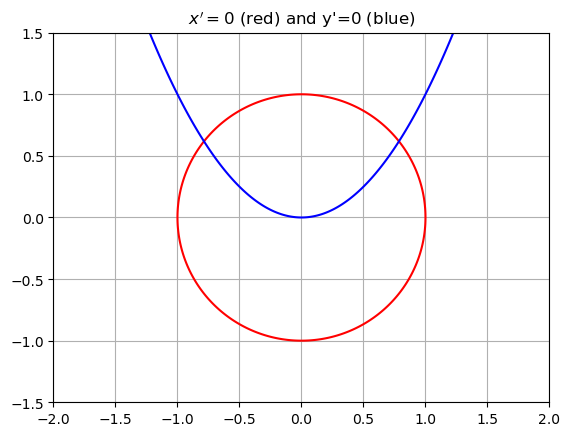

In [3]:
f = lambda x,y: x**2 + y**2 - 1
g = lambda x,y: x**2 - y

nullclines(f,g,[-2,2],[-1.5,1.5])

## Critical Points

A critical point $(x^*,y^*)$ of the system satisfies $f(x^*,y^*) = 0$ and $g(x^*,y^*) = 0$. In other words, a critical point is a point of intersection of the nullclines.

The function `critical` takes input parameters `f`, `g`, `x0` and `y0` where:

* `f` is a Python function which represents the equation `x' = f(x,y)`
* `g` is a Python function which represents the equation `y' = g(x,y)`
* `x0` is an initial guess of the $x$ coordinate of a critical point
* `y0` is an initial guess of the $y$ coordinate of a critical point

The function `critical` computes an approximation of a critical point $(x^*,y^*)$ near the point $(x_0,y_0)$.

In [4]:
def critical(f,g,x0,y0):
    F = lambda x: np.array([f(x[0],x[1]),g(x[0],x[1])])
    x,y = fsolve(F,[x0,y0])
    return x,y

The plot of the nullclines in the previous example shows that there are 2 critical points.

Approximate the critical point near $(0.7,0.6)$.

In [5]:
f = lambda x,y: x**2 + y**2 - 1
g = lambda x,y: x**2 - y

x1,y1 = critical(f,g,0.7,0.6)
print(x1,y1)

0.7861513777487092 0.6180339886864274


Approximate the critical point near $(-0.7,0.6)$.

In [6]:
x2,y2 = critical(f,g,-0.7,0.5)
print(x2,y2)

-0.7861513777574232 0.6180339887498933


## Jacobians

The Jacobian of the system at a critical $(x^*,y^*)$ is given by

$$
J = \begin{bmatrix} f_x(x^*,y^*) & f_y(x^*,y^*) \\ g_x(x^*,y^*) & g_y(x^*,y^*) \end{bmatrix}
$$

For example, the general formula for the Jacobian from the previous example is

$$
J = \begin{bmatrix} 2x^* & 2y^* \\ 2x^* & -1 \end{bmatrix}
$$

Get the $x$ and $y$ coordinates critical point near $(0.7,0.6)$.

In [7]:
print(x1,y1)

0.7861513777487092 0.6180339886864274


Create the Jacobian matrix.

In [8]:
J1 = np.array([[2*x1,2*y1],[2*x1,-1]])
print(J1)

[[ 1.57230276  1.23606798]
 [ 1.57230276 -1.        ]]


Compute the eigenvalues and eigenvectors.

In [9]:
evals1,evecs1 = la.eig(J1)
print(evals1)

[ 2.18290082+0.j -1.61059807+0.j]


Note that the function `scipy.linalg.eig` always returns the eigenvalues as complex numbers. We need to interpret the output. In this case, the imginary parts are 0 therefore the eiganvalues are real and have opposite sign. Therefore the critical point near $(0.7,0.6)$ is a saddle point.

Now compute eigenvalues of the Jacobian at the critical point near $(-0.7,0.6)$.

In [10]:
J2 = np.array([[2*x2,2*y2],[2*x2,-1]])
evals2,evecs2 = la.eig(J2)
print(evals2)

[-1.28615138+1.36440114j -1.28615138-1.36440114j]


The eigenvalues of the Jacobian are complex with negative real part. Therefore the critical point near $(-0.7,0.6)$ is a spiral sink.

## Numerical Solutions

The function `solution` takes input parameters `f`, `g`, `x0`, `y0` and `tf` where:

* `f` is a Python function which represents the equation `x' = f(x,y)`
* `g` is a Python function which represents the equation `y' = g(x,y)`
* `x0` defines the initial value $x(0)$
* `y0` defines the initial value $y(0)$
* `tf` defines an interval $t \in [0,t_f]$ for the nuemrical solution

The function `solution` plots a numerical approximation of the trajectory $(x(t),y(t))$ of the solution with initial value $(x(0),y(0))$.

In [11]:
def solution(f,g,x0,y0,tf):
    F = lambda x,t: np.array([f(x[0],x[1]),g(x[0],x[1])])
    t = np.linspace(0,tf,int(tf*100))
    u = odeint(F,[x0,y0],t)
    plt.plot(u[:,0],u[:,1],'k')

For example, let's plot numerical solutions for different initial values:

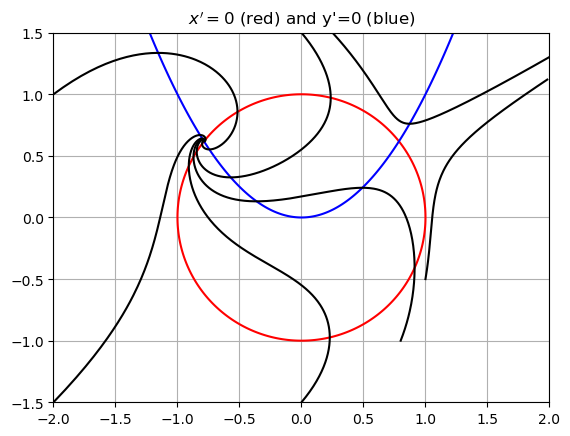

In [12]:
f = lambda x,y: x**2 + y**2 - 1
g = lambda x,y: x**2 - y

nullclines(f,g,[-2,2],[-1.5,1.5])
solution(f,g,-2,1,5)
solution(f,g,0.8,-1,5)
solution(f,g,0,-1.5,5)
solution(f,g,-2,-1.5,5)
solution(f,g,0.25,1.5,2.25)
solution(f,g,0,1.5,5)
solution(f,g,1,-0.5,1.3)

Note that the choice `tf` in each trajectory is arbitrary. We simply choose a value which illustrates the shape of the trajectory within the window of the nullcline plot.

# Problem 1 (11 marks)

Consider the 2-dimensional autonomous first order system of equations

$$
\begin{align*}
x' &= 2x^4 - x^2 y + y^2 - 1 \\
y' &= x^2 - y^3
\end{align*}
$$

**Part A.** Enter the functions $f(x,y)$ and $g(x,y)$ as Python functions called `f1` and `g1`.

In [13]:
# YOUR CODE HERE
f1 = lambda x,y: 2*x**4-y*x**2+y**2-1
g1 = lambda x,y: x**2-y**3

In [14]:
# Test 1: Check if f1 and g1 are functions. (1 mark)
assert callable(f1) , "f1 should be a function."
assert callable(g1) , "f1 should be a function."
print("Test 1: Success!")

Test 1: Success!


In [15]:
# Test 2: Check if f1 and g1 return correct values. (1 mark)
assert np.allclose(f1(1,1),1)
assert np.allclose(f1(0,2),3)
assert np.allclose(g1(-1,0),1)
assert np.allclose(g1(2,2),-4)
print("Test 2: Success!")

Test 2: Success!


In [16]:
# Test 3: Check if f1 and g1 are defined correctly. This cell contains hidden tests. (1 mark)

Plot the nullclines:

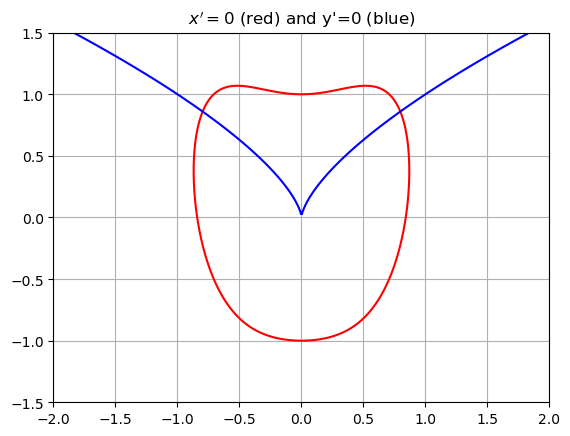

In [17]:
nullclines(f1,g1,[-2,2],[-1.5,1.5])

**Part B.** The figure above shows that there are 2 critical points. Compute the $x$ and $y$ coordinates of the critical point $(x^*,y^*)$ with $x^* > 0$. Save the values as `x1b` and `y1b`. We are expecting values accurate to at least 12 decimal places.

In [18]:
# YOUR CODE HERE
x1b,y1b = critical(f1,g1,0.7,0.7)

In [19]:
# Test 1: Check if x1b and y1b are positive numbers. (1 mark)
assert x1b > 0
assert y1b > 0
print("Test 1: Success!")

Test 1: Success!


In [20]:
# Test 2: Check if x1b and y1b are correct values (up to at least 8 decimal places). This cell contains hidden tests. (1 mark)

Plot the critical point with the nullclines:

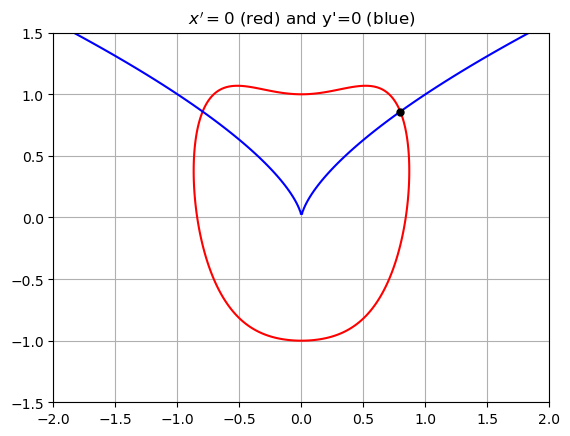

In [21]:
nullclines(f1,g1,[-2,2],[-1.5,1.5])
plt.plot(x1b,y1b,'k.',ms=10)
plt.show()

**Part C.** Compute the Jacobian at the critical point found in part c. Save the matrix as `J1c`.

In [22]:
# YOUR CODE HERE
J1c = np.array([[8*x1b**3-2*x1b*y1b,-x1b**2+2*y1b],[2*x1b,-3*y1b**2]])

In [23]:
# Test 1: Check if J1c is a 2 x 2 NumPy array with correct top left entry. (1 mark)
assert isinstance(J1c,np.ndarray)
assert J1c.shape == (2,2)
assert np.allclose(J1c[0,0],2.6802655)
print("Test 1: Success!")

Test 1: Success!


In [24]:
# Test 2: Check if J1c has the correct values. This cell contains hidden tests. (1 mark)

**Part D.** Compute the eigevalues of `J1c` and classify the critical point as one of the folllowing: `'source'`, `'sink'`, `'spiral source'`, `'spiral sink'`, `'saddle point'`, `'center'`. Save your response as `classification1d.`

In [26]:
# YOUR CODE HERE
evals1d,evecs1d = la.eig(J1c)
classification1d = 'saddle point'

In [27]:
# Test 1: Check if classification1d is one of the names. (1 mark)
assert classification1d in ['source','sink','spiral source','spiral sink','saddle point','center']
print("Test 1: Success!")

Test 1: Success!


In [28]:
# Test 2: Check if classification1d is the listed classications. This cell contains hidden tests. (1 mark)

**Part E.** Plot sample trajectories for the system near the other critical point $(x^*,y^*)$ with $x^* < 0$. Classify the critical point as one of the folllowing: `'source'`, `'sink'`, `'spiral source'`, `'spiral sink'`, `'saddle point'`, `'center'`. Save your response as `classification1e.`

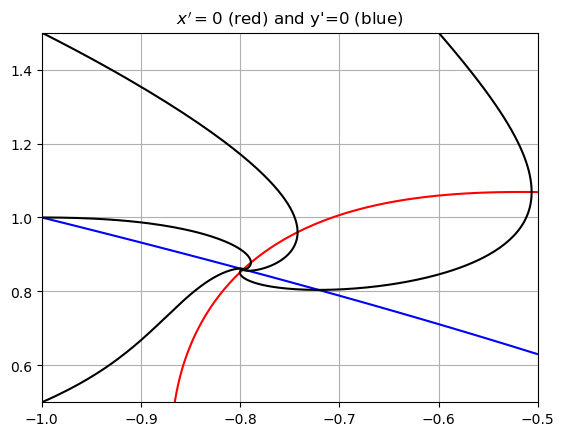

In [29]:
nullclines(f1,g1,[-1,-0.5],[.5,1.5])
solution(f1,g1,-1,1.5,4)
solution(f1,g1,-.6,1.5,4)
solution(f1,g1,-1,1,4)
solution(f1,g1,-1,.5,4)

In [30]:
# YOUR CODE HERE
classification1e = 'spiral sink'

In [31]:
# Test 1: Check if classification1e is one of the listed classications. (1 mark)
assert classification1e in ['source','sink','spiral source','spiral sink','saddle point','center']
print("Test 1: Success!")

Test 1: Success!


In [32]:
# Test 2: Check if classification1e is the correct classification. This cell contains hidden tests. (1 mark)

## Problem 2 (7 marks)

Consider the 2-dimensional autonomous first order system of equations

$$
\begin{align*}
x' &= 2x - 4xy \\
y' &= 4xy - 2y
\end{align*}
$$

**Part A.** Enter the functions $f(x,y)$ and $g(x,y)$ as Python functions called `f2` and `g2`.

In [33]:
# YOUR CODE HERE
f2 = lambda x,y: 2*x-4*x*y
g2 = lambda x,y: 4*x*y-2*y

In [34]:
# Test 1: Check if f2 and g2 are functions. (1 mark)
assert callable(f2) , "f2 should be a function."
assert callable(g2) , "f2 should be a function."
print("Test 1: Success!")

Test 1: Success!


In [35]:
# Test 2: Check if f2 and g2 return correct values. (1 mark)
assert np.allclose(f2(1,1),-2)
assert np.allclose(f2(0,2),0)
assert np.allclose(g2(-1,0),0)
assert np.allclose(g2(2,2),12)
print("Test 2: Success!")

Test 2: Success!


In [36]:
# Test 3: Check if f2 and g2 are defined correctly. This cell contains hidden tests. (1 mark)

Plot the nullclines:

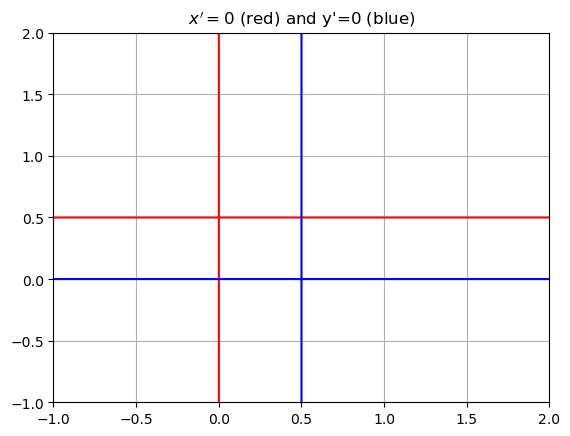

In [37]:
nullclines(f2,g2,[-1,2],[-1,2])

**Part B.** There are 2 critical points. One critical point at $(0,0)$ and the other at $(0.5,0.5)$. Compute the Jacobian at $(0.5,0.5)$ and save the result as `J2b`.

In [ ]:
# YOUR CODE HERE
x2b =0.5
y2b = 0.5


In [ ]:
# Test 1: Check if J2b is a 2 x 2 NumPy array with correct top left entry. (1 mark)
assert isinstance(J2b,np.ndarray)
assert J2b.shape == (2,2)
assert np.allclose(J2b[0,0],0.)
print("Test 1: Success!")

In [ ]:
# Test 2: Check if J2b has the correct values. This cell contains hidden tests. (1 mark)

In this example, the eigenvalues of the Jacobian are pure imaginary and therefore we cannot classify the critical point without more information.

In [ ]:
evals2b,evecs2b = la.eig(J2b)
print(evals2b)

**Part C.** Plot sample trajectories and observe the results. Classify the critical point $(0.5,0.5)$ based on the shape of trajectories in the figure below. Classify the critical point as one of the folllowing: `'source'`, `'sink'`, `'spiral source'`, `'spiral sink'`, `'saddle point'`, `'center'`. Save your response as `classification2c.`

In [ ]:
solution(f2,g2,0.1,0.1,4)
solution(f2,g2,0.2,0.2,4)
solution(f2,g2,0.3,0.3,4)
solution(f2,g2,0.4,0.4,4)
solution(f2,g2,0.5,0.5,4)

In [ ]:
# YOUR CODE HERE

In [ ]:
# Test 1: Check if classification2c is one of the listed classications. (1 mark)
assert classification2c in ['source','sink','spiral source','spiral sink','saddle point','center']
print("Test 1: Success!")

In [ ]:
# Test 2: Check if classification2c is the correct classification. This cell contains hidden tests. (1 mark)